In [1]:
options(warn = -1)
options(repr.plot.width = 15, repr.plot.height = 9)
# 맥에서는 실행해야 한글이 보임
Sys.setlocale(category = 'LC_ALL',locale = 'ko_KR.UTF-8')

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

# 회귀 분석

In [2]:
# 단순 회귀 분석
regression <- read.csv("../Data/regression.csv")
head(regression)
tail(regression)

,age,Height,Weight
,<chr>,<dbl>,<dbl>
1,0~3Months,59.1,5.9
2,3~6Months,66.7,8.0
3,6~9Months,71.4,8.9
4,9~12Months,75.0,10.1
5,12~18Months,80.1,10.9
6,2Year,87.8,13.2


,age,Height,Weight
,<chr>,<dbl>,<dbl>
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


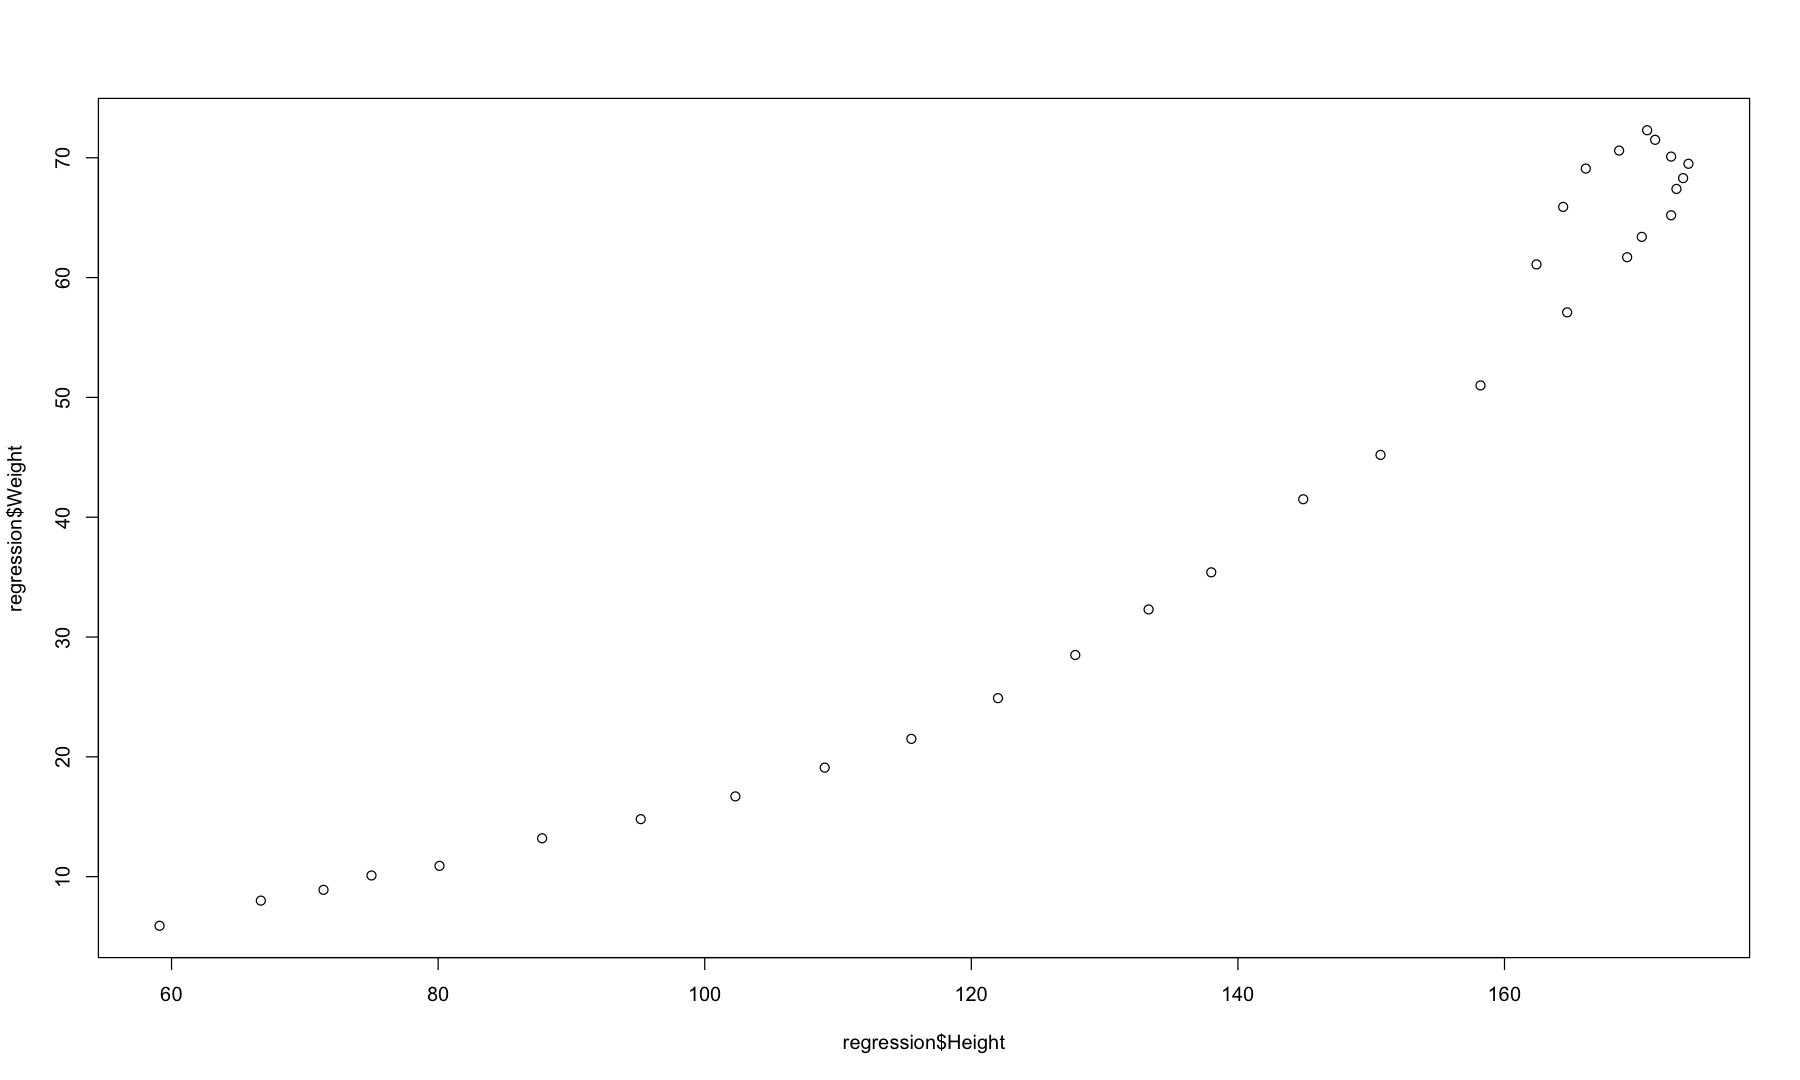

In [3]:
par(bg = "white")
plot(
    regression$Height,
    regression$Weight,
)

In [4]:
# 상관계수
cor(regression$Height, regression$Weight)

[1] 0.9672103

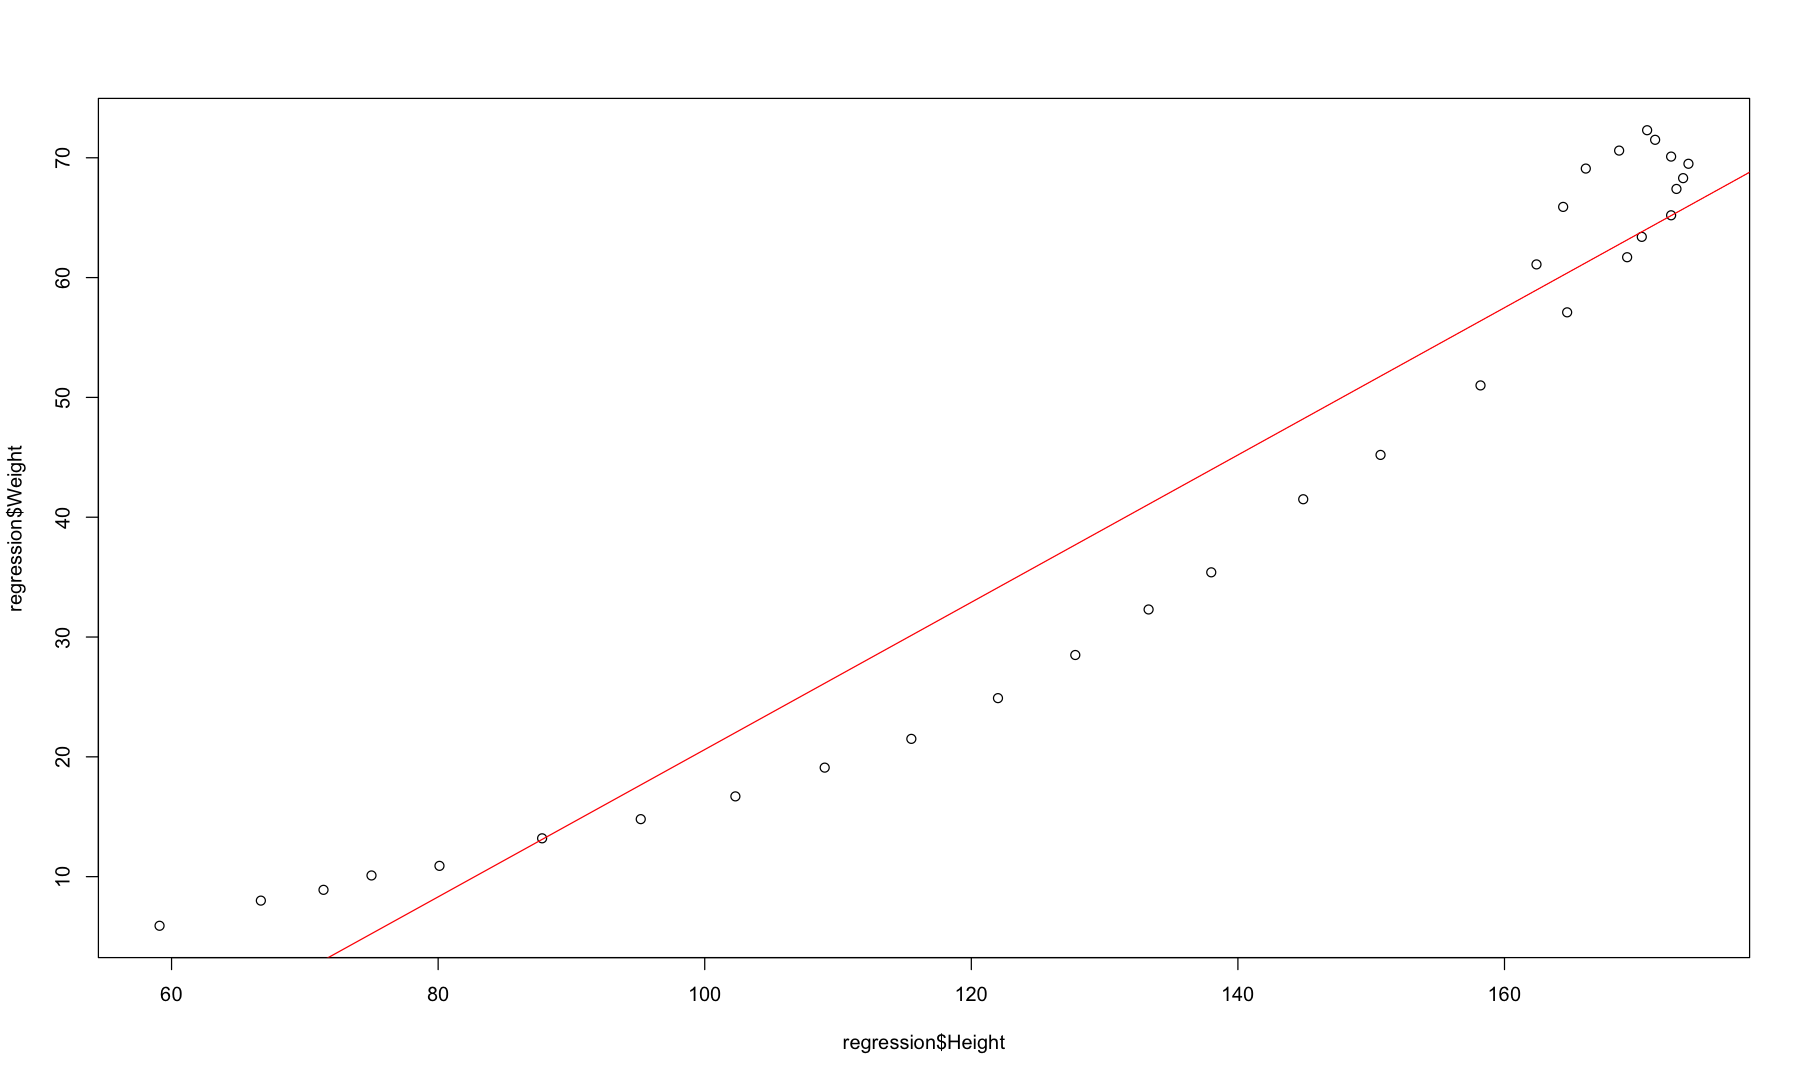

In [5]:
par(bg = "white")
plot(regression$Weight ~ regression$Height)

# 회귀식
r <- lm(regression$Weight ~ regression$Height) # lm(종속변수 ~ 독립변수)
abline(r, col="red")

In [6]:
# 분석결과 
summary(r)

# 예측값과 실제값의 차이
# Residuals:
#     Min      1Q  Median      3Q     Max 
# -9.2327 -5.9811  0.0915  5.3125 10.4346 

# 절편
# (Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***

# Coefficients
# 계수 / y=ax+b에서 a와 b

# Coefficients:
#                    Estimate Std. Error t value Pr(>|t|)    
# (Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***
# regression$Height   0.61474    0.02998  20.508  < 2e-16 *** # 별표시는 기여도 3개면 좋음
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# 오차
# Residual standard error: 6.355


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***
regression$Height   0.61474    0.02998  20.508  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 2.2e-16


p-value: < 2.2e-16  < 0.05    -> 대립가설    
Adjusted R-squared:  0.9333   <- 예측력

Weight = 0.61474 * Height + -40.86594 이라는 공식 생성

In [7]:
r


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


In [8]:
# 키가 170cm인 사람의 몸무게
0.6147 * 170 - 40.8659

# 표준오차를 적용한 키가 170인 사람의 몸무게
cat(0.6147 * 170 - 40.8659 - 6.355, "~", 0.6147 * 170 - 40.8659 + 6.355)

[1] 63.6331

57.2781 ~ 69.9881

### IQ

In [9]:
iq <- read.csv("../Data/IQ.csv")
head(iq)

,이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
,<chr>,<int>,<int>,<int>,<int>,<int>
1,A,90,140,2,1,0
2,B,75,125,1,3,3
3,C,77,120,1,0,4
4,D,83,135,2,3,2
5,E,65,105,0,4,4
6,F,80,123,3,1,1


In [10]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
# 1) 성적과 가장 관련이 깊은 항목?
# cor(iq$`성적`, iq[, 3:6])
score_cor <- as.data.frame(abs(cor(iq[, 3:6], iq$`성적`)))
colnames(score_cor) <- c("상관계수")
arrange(score_cor, desc(상관계수))

iq[-1]
cor(iq[-1])


,상관계수
,<dbl>
IQ,0.9102242
TV시청.시간,0.8473333
다니는.학원수,0.7840514
게임하는.시간,0.3383549


성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
<int>,<int>,<int>,<int>,<int>
90,140,2,1,0
75,125,1,3,3
77,120,1,0,4
83,135,2,3,2
65,105,0,4,4
80,123,3,1,1
83,132,3,4,1
70,115,1,1,3
87,128,4,0,0


,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


In [12]:
# 2) IQ가 126인 사람의 성적을 예측해 보세요
r_iq <- lm(iq$성적 ~ iq$IQ) # lm(종속변수 ~ 독립변수)

In [13]:
summary(r_iq)


Call:
lm(formula = iq$성적 ~ iq$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq$IQ         0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [14]:
predict_iq_by_score <- function(iq){
    0.6714 * iq
}

In [15]:
predict_iq_by_score(126)

[1] 84.5964

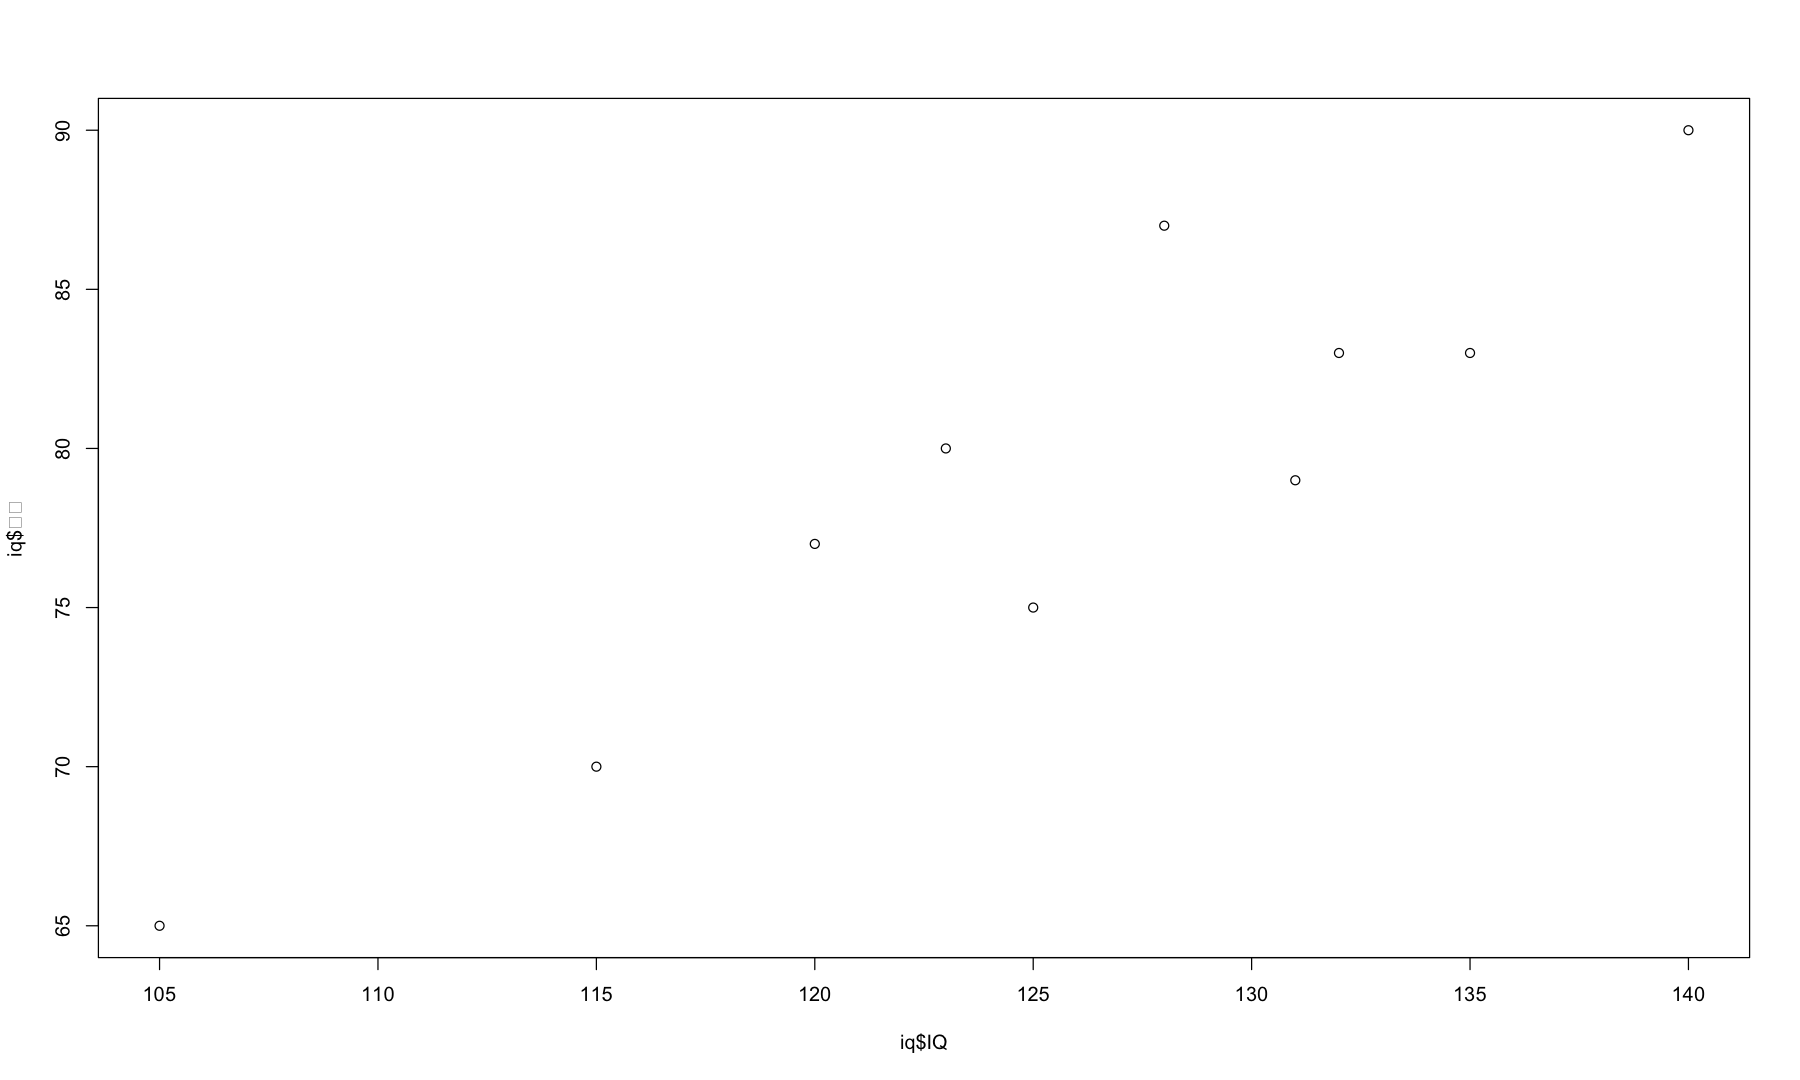

In [16]:
par(bg = "white")
plot(iq$성적 ~ iq$IQ)

In [17]:
# 3) 학원을 몇군데 다녀야 성적이 90점이 될까?
r_academy <- lm(iq$`성적` ~ iq$`다니는.학원수`)

In [18]:
summary(r_academy)


Call:
lm(formula = iq$성적 ~ iq$다니는.학원수)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4884 -3.8372 -0.8721  2.0581 10.6047 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        69.488      3.069  22.642 1.53e-08 ***
iq$다니는.학원수    4.953      1.386   3.573  0.00726 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.98 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264


In [19]:
i  = ceiling((90 - 69.488) / 4.953)
i
# 예측력???

[1] 5

In [20]:
# 4) 성적이 85점 이상이려면 IQ는 얼마이상?
r_iq.score <- lm(iq$IQ ~ iq$`성적`)

In [21]:
summary(r_iq.score)


Call:
lm(formula = iq$IQ ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
iq$성적       1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [22]:
1.234*85 + 4.504
1.234*85 - 4.504


[1] 109.394

[1] 100.386

## 다중회귀
: 여러개의 항목들로 구성된 식으로 예측하는 방법 

In [23]:
data(attitude)
# 대형 금융기관 사무직 직원을 대상으로 진급의 요소에 대한 설문조사

In [24]:
help(attitude)

attitude               package:datasets                R Documentation

_T_h_e _C_h_a_t_t_e_r_j_e_e-_P_r_i_c_e _A_t_t_i_t_u_d_e _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     From a survey of the clerical employees of a large financial
     organization, the data are aggregated from the questionnaires of
     the approximately 35 employees for each of 30 (randomly selected)
     departments.  The numbers give the percent proportion of
     favourable responses to seven questions in each department.

_U_s_a_g_e:

     attitude
     
_F_o_r_m_a_t:

     A data frame with 30 observations on 7 variables. The first column
     are the short names from the reference, the second one the
     variable names in the data frame:

          Y  rating      numeric  Overall rating                    
       X[1]  complaints  numeric  Handling of employee complaints   
       X[2]  privileges  numeric  Does not allow special privileges 
       X[3]  learni

In [25]:
head(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43,51,30,39,61,92,45
2,63,64,51,54,63,73,47
3,71,70,68,69,76,86,48
4,61,63,45,47,54,84,35
5,81,78,56,66,71,83,47
6,43,55,49,44,54,49,34


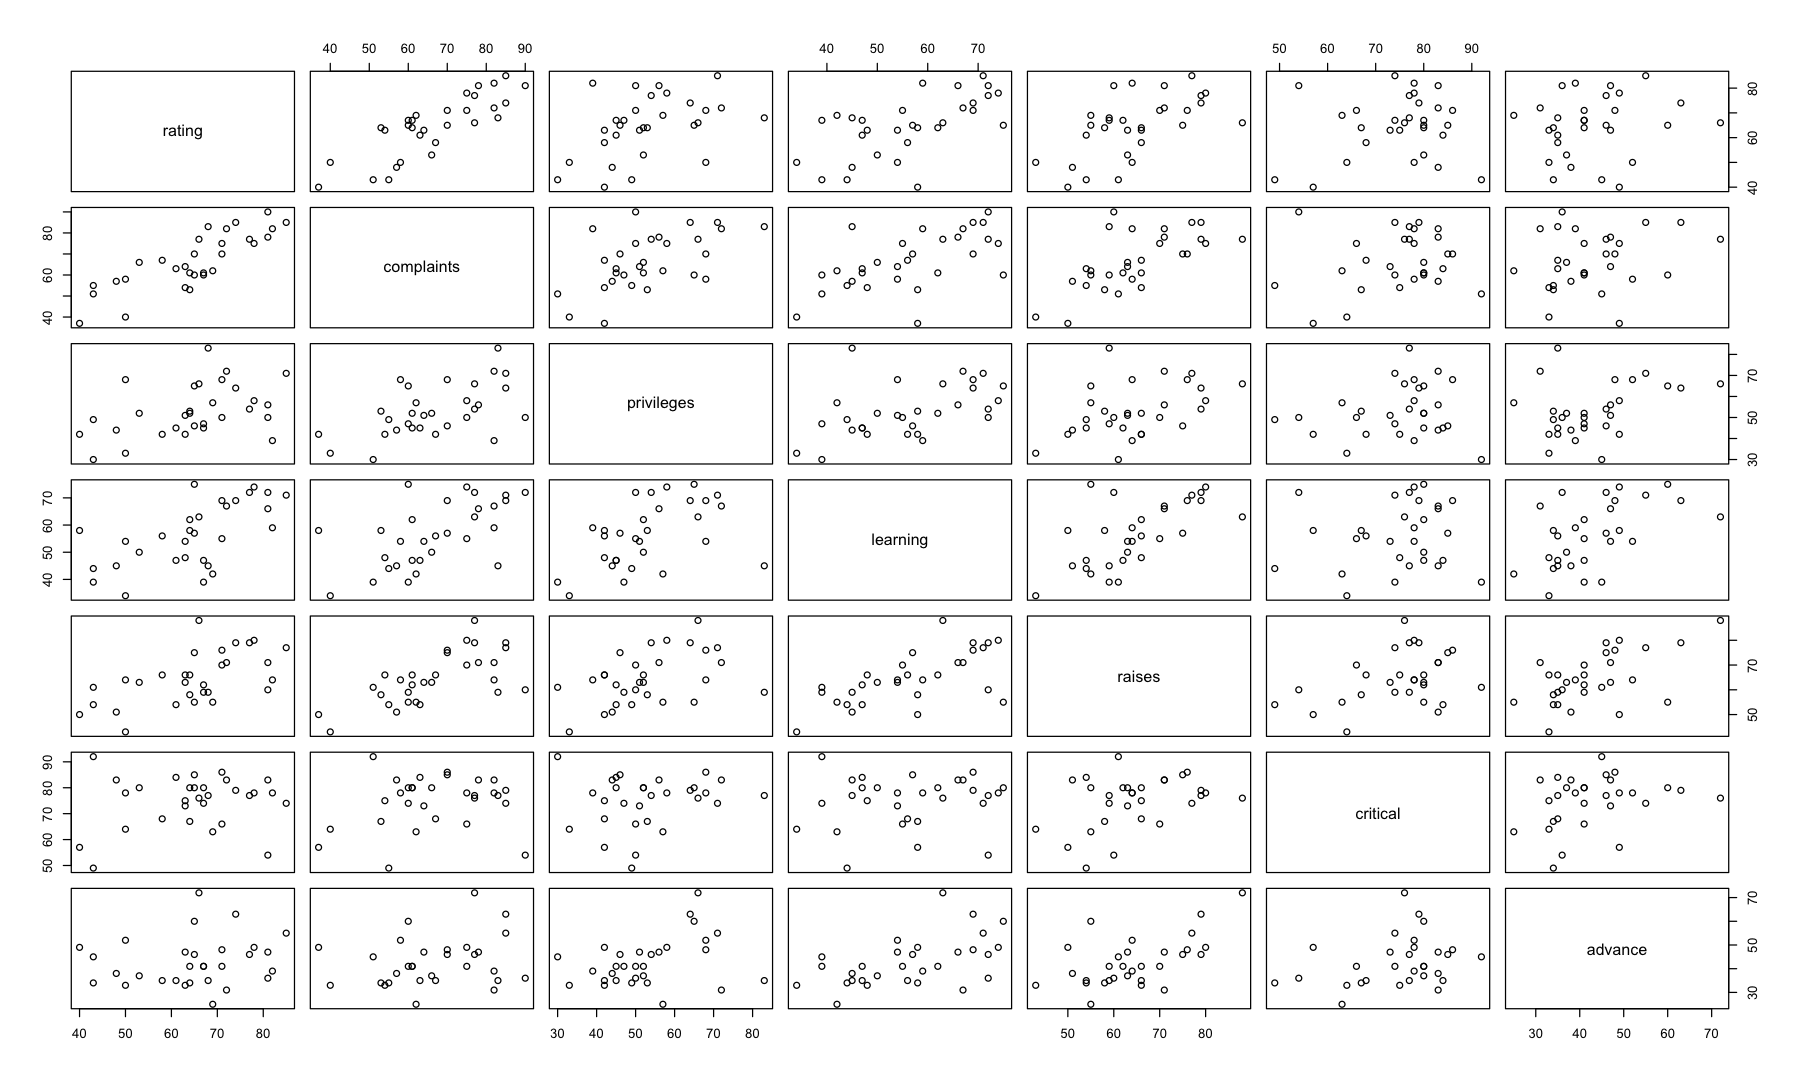

In [26]:
par(bg = "white")
plot(attitude)

In [27]:
# 모델 만들기
model <- lm(rating ~ ., data = attitude)
model


Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


In [28]:
summary(model)


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


In [29]:
cor(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


In [30]:
# 예측력을 높히기 위해 상대적으로 기여도가 낮은 변수를 제거
reduced <- step(model, direction = "backward")
reduced

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Coefficients:
(Intercept)   complaints     learning  
     9.8709       0.6435       0.2112  


In [31]:
summary(reduced)


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398    0.174    
complaints    0.6435     0.1185   5.432 9.57e-06 ***
learning      0.2112     0.1344   1.571    0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 6.058e-08


In [32]:
model <- lm(rating ~ complaints, data = attitude)
summary(model)


Call:
lm(formula = rating ~ complaints, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8799  -5.9905   0.1783   6.2978   9.6294 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.37632    6.61999   2.172   0.0385 *  
complaints   0.75461    0.09753   7.737 1.99e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.993 on 28 degrees of freedom
Multiple R-squared:  0.6813,	Adjusted R-squared:  0.6699 
F-statistic: 59.86 on 1 and 28 DF,  p-value: 1.988e-08


### iris에 대한 다중회귀분석

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


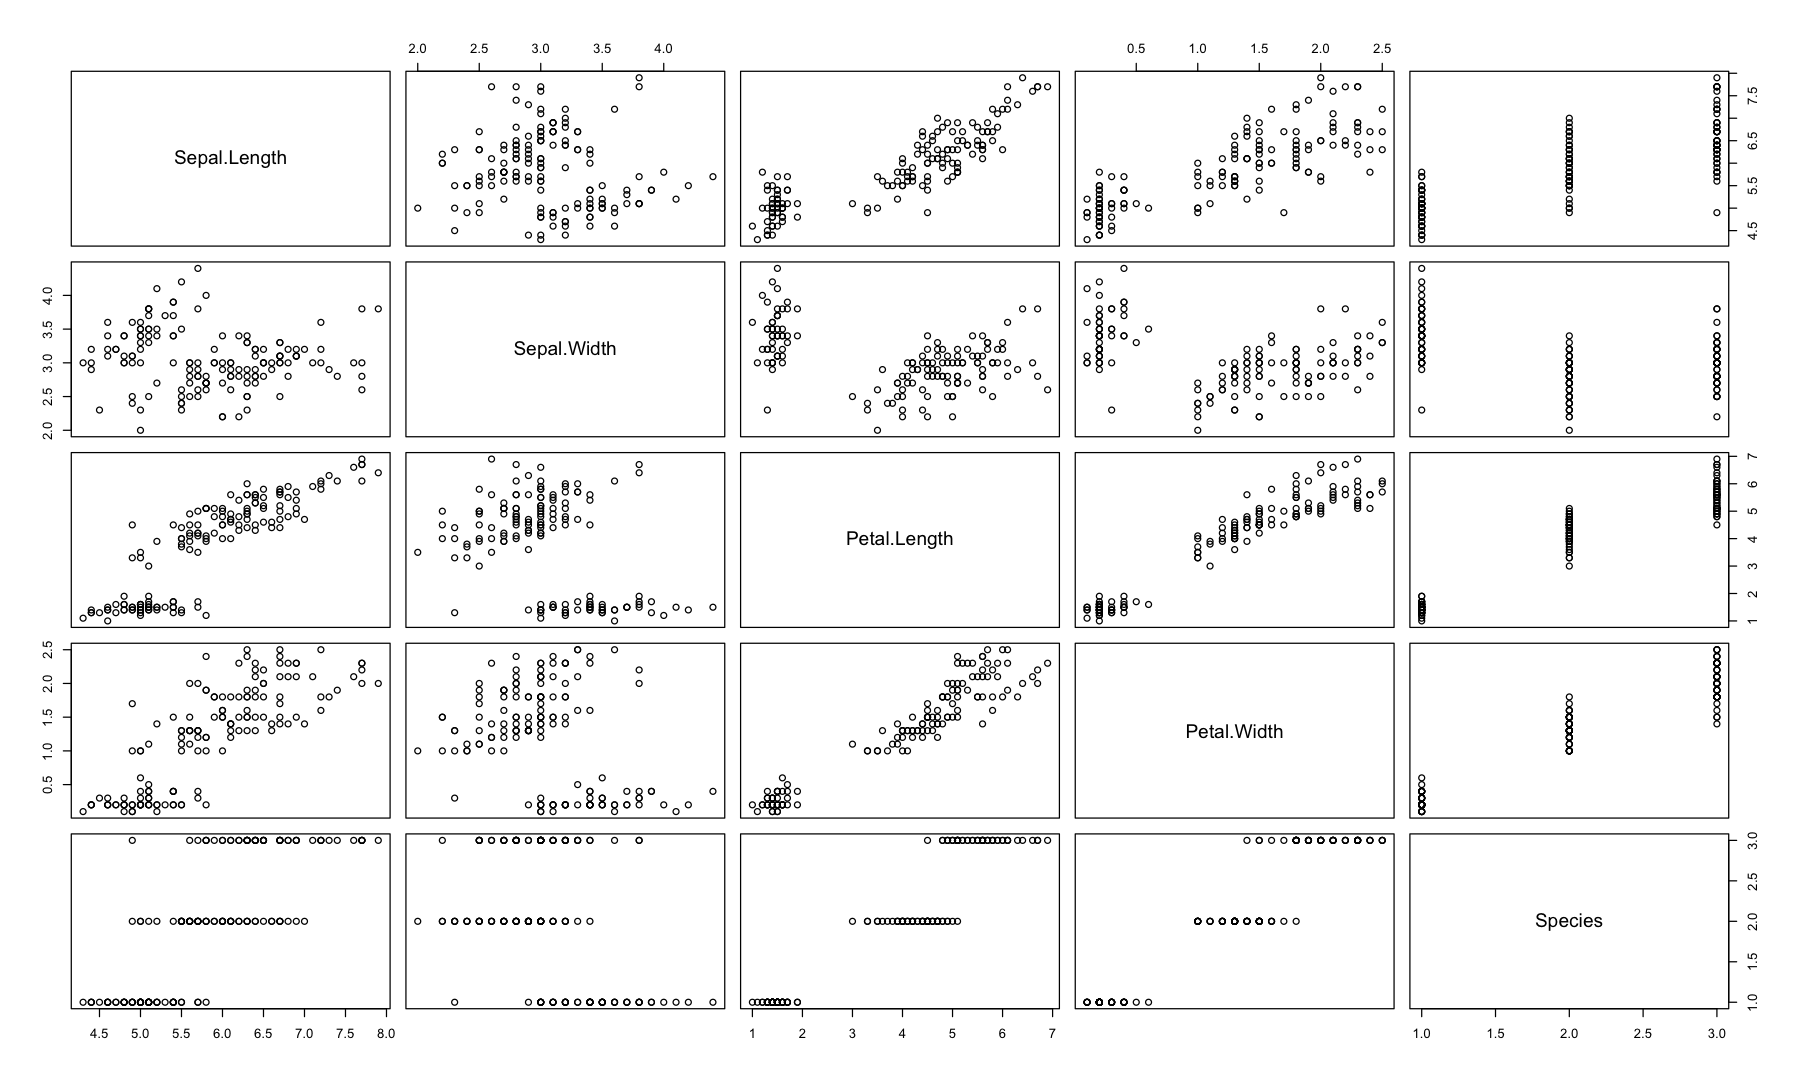

In [36]:
par(bg = "white")
plot(
    iris
)
head(iris)

In [42]:
iris_data <- iris
iris_data$Species = as.numeric(iris_data$Species)

model <- lm(Species ~ ., data = iris_data)
model


Call:
lm(formula = Species ~ ., data = iris_data)

Coefficients:
 (Intercept)  Sepal.Length   Sepal.Width  Petal.Length   Petal.Width  
     1.18650      -0.11191      -0.04008       0.22865       0.60925  


In [43]:
summary(model)


Call:
lm(formula = Species ~ ., data = iris_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59215 -0.15368  0.01268  0.11089  0.55077 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.18650    0.20484   5.792 4.15e-08 ***
Sepal.Length -0.11191    0.05765  -1.941   0.0542 .  
Sepal.Width  -0.04008    0.05969  -0.671   0.5030    
Petal.Length  0.22865    0.05685   4.022 9.26e-05 ***
Petal.Width   0.60925    0.09446   6.450 1.56e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.5 on 4 and 145 DF,  p-value: < 2.2e-16


In [44]:
reduced <- step(model, direction = "backward")

Start:  AIC=-450.56
Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
- Sepal.Width   1   0.02164 6.9823 -452.09
<none>                      6.9606 -450.56
- Sepal.Length  1   0.18090 7.1415 -448.71
- Petal.Length  1   0.77649 7.7371 -436.69
- Petal.Width   1   1.99710 8.9577 -414.72

Step:  AIC=-452.09
Species ~ Sepal.Length + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
<none>                      6.9823 -452.09
- Sepal.Length  1   0.44324 7.4255 -444.86
- Petal.Length  1   1.51946 8.5017 -424.56
- Petal.Width   1   2.11632 9.0986 -414.38


In [45]:
summary(reduced)


Call:
lm(formula = Species ~ Sepal.Length + Petal.Length + Petal.Width, 
    data = iris_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60753 -0.16188  0.01367  0.11217  0.54740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.14469    0.19478   5.877 2.72e-08 ***
Sepal.Length -0.13624    0.04475  -3.044  0.00277 ** 
Petal.Length  0.25213    0.04473   5.637 8.67e-08 ***
Petal.Width   0.58689    0.08822   6.652 5.41e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2187 on 146 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9287 
F-statistic: 648.3 on 3 and 146 DF,  p-value: < 2.2e-16


In [46]:
summary(lm(formula = Species ~ Petal.Length + Petal.Width, 
    data = iris_data))


Call:
lm(formula = Species ~ Petal.Length + Petal.Width, data = iris_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56449 -0.13898  0.01482  0.10172  0.58898 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.57378    0.05411  10.603  < 2e-16 ***
Petal.Length  0.17832    0.03863   4.616 8.47e-06 ***
Petal.Width   0.63042    0.08947   7.046 6.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2248 on 147 degrees of freedom
Multiple R-squared:  0.9257,	Adjusted R-squared:  0.9247 
F-statistic: 916.3 on 2 and 147 DF,  p-value: < 2.2e-16
